In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1.Read the dataset into Python Environment

In [515]:
dset=pd.read_csv('/content/Wholesale customers data.csv')

In [516]:
dset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [517]:
dset.shape

(440, 8)

In [518]:
dset.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [519]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [520]:
dset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


##2. Data Preprocessing

1.Missing values Handling

In [521]:
dset.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


2.Outlier Detection

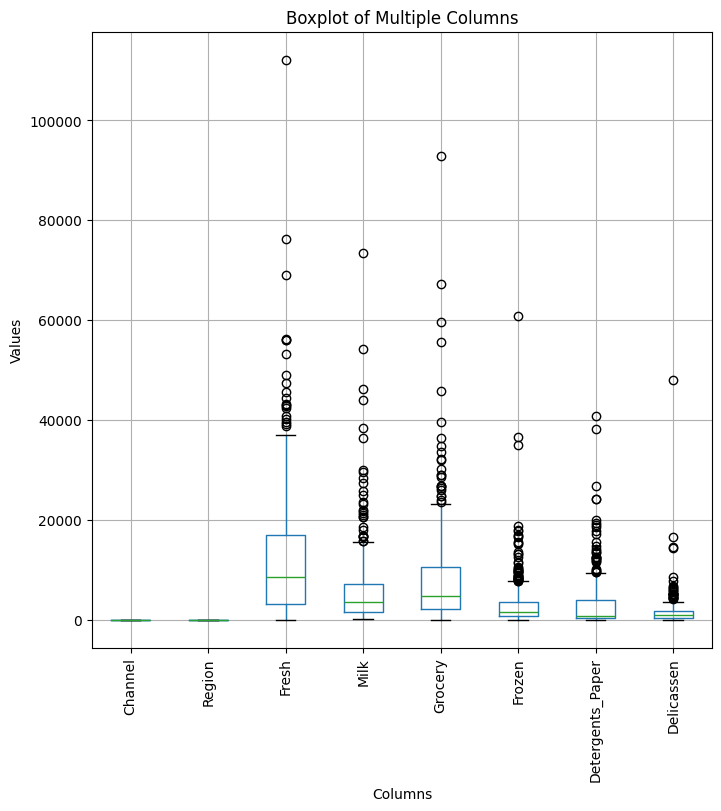

In [522]:

# Create boxplot
plt.figure(figsize=(8,8))
dset.boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Boxplot of Fresh')

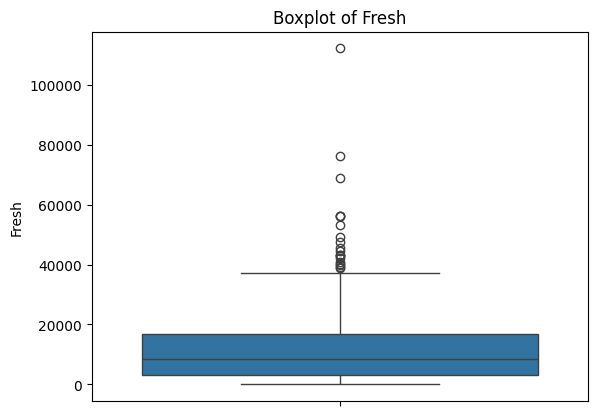

In [523]:
#   Boxplot of the Fresh before outlier treatment.
sns.boxplot(y=dset['Fresh'],data=dset)
plt.title('Boxplot of Fresh')

Text(0.5, 1.0, 'Boxplot of Milk')

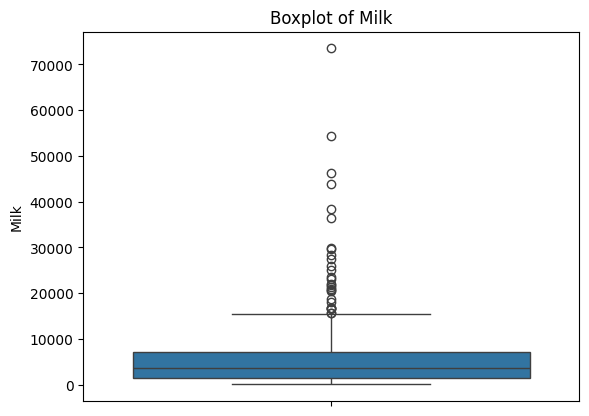

In [524]:
#   Boxplot of the Milk before outlier treatment.
sns.boxplot(y=dset['Milk'],data=dset)
plt.title('Boxplot of Milk')

Text(0.5, 1.0, 'Boxplot of Grocery')

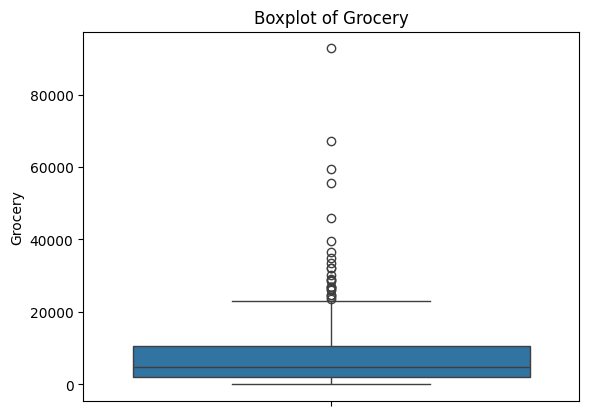

In [525]:
#   Boxplot of the Grocery before outlier treatment.
sns.boxplot(y=dset['Grocery'],data=dset)
plt.title('Boxplot of Grocery')

Text(0.5, 1.0, 'Boxplot of Detergents_Paper')

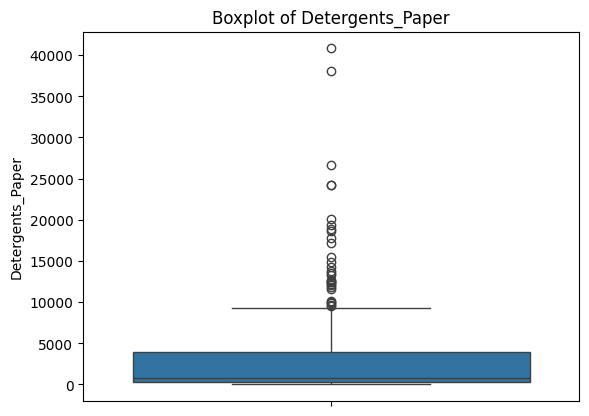

In [526]:
#   Boxplot of the Detergents_Paper before outlier treatment.
sns.boxplot(y=dset['Detergents_Paper'],data=dset)
plt.title('Boxplot of Detergents_Paper')

Text(0.5, 1.0, 'Boxplot of Frozen')

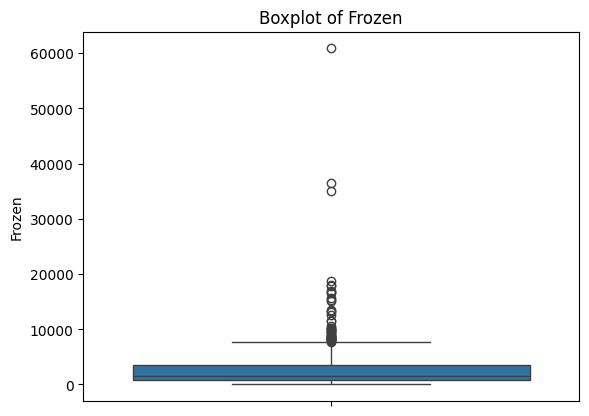

In [527]:
#   Boxplot of the Frozen before outlier treatment.
sns.boxplot(y=dset['Frozen'],data=dset)
plt.title('Boxplot of Frozen')

Text(0.5, 1.0, 'Boxplot of Delicassen')

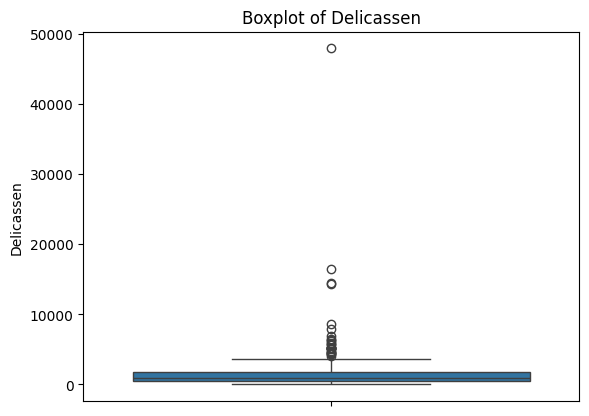

In [528]:
#   Boxplot of the Delicassen before outlier treatment.
sns.boxplot(y=dset['Delicassen'],data=dset)
plt.title('Boxplot of Delicassen')

In [529]:
# Columns to apply the IQR method to
Outliers =['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
# Create boxplot
# Applying the IQR method to each specified column
for column in Outliers:
    Q1 = dset[column].quantile(0.25)
    Q3 = dset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dset[column] = np.where(dset[column] < lower_bound, lower_bound, dset[column])
    dset[column] = np.where(dset[column] > upper_bound, upper_bound, dset[column])

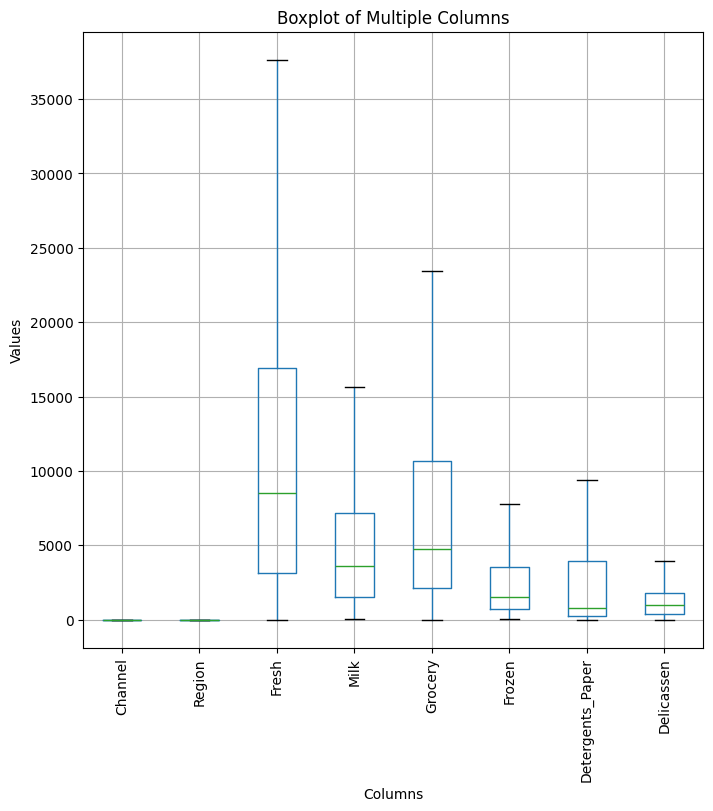

In [530]:
#==>After Outlier Detection==>

# Create boxplot
plt.figure(figsize=(8,8))
dset.boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

In this dataset all the labels are in numerical data so encoding is not applied

Data visualization

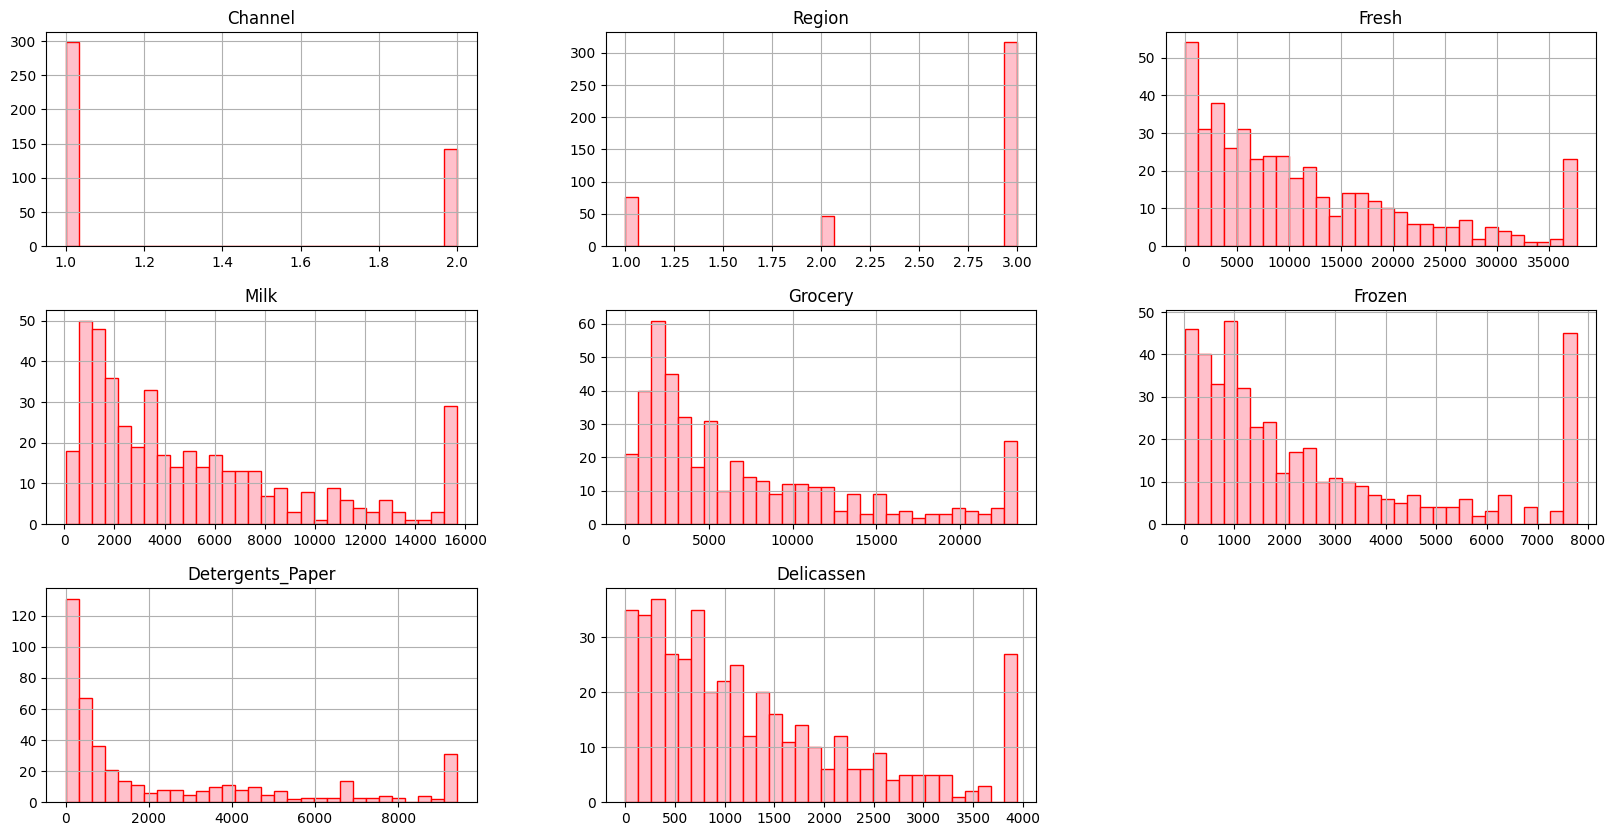

In [531]:
# 1. Univariate Analysis
# Histogram
dset.hist(figsize=(20,10),bins=30,color='pink',edgecolor='red')
plt.show()

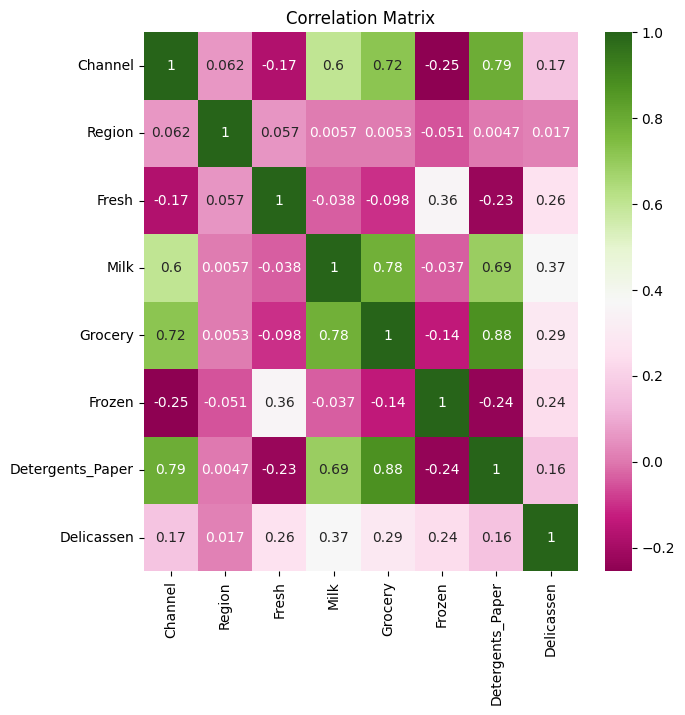

In [532]:
# 3. Multivariate analysis
corr = dset.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap ='PiYG')
plt.title('Correlation Matrix')
plt.show()


In [533]:
#display minimum correlation values
#mcorr=corr['Detergents_Paper'][:-1].min()
#mcorr

In [534]:
#display minimum correlation values in column
#corr[corr['Detergents_Paper']==mcorr].index.to_list()

In [535]:

dset.drop(['Region'], axis=1, inplace=True)
dset.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,2,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,2,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,1,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,2,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


**Scaling**

In [536]:
from sklearn.model_selection import train_test_split
x = dset.drop(columns=['Channel'])
y = dset['Channel']

In [537]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [538]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled_xtrain=scaler.fit_transform(x_train)
Scaled_xtest=scaler.fit_transform(x_test)

In [539]:
## Convert scaled data  to Dataset with the same feature columns
## Convert scaled data back to DataFrame with the same feature columns
x_train_stand_scaled_dset = pd.DataFrame(Scaled_xtrain, columns=x.columns)
x_test_stand_scaled_dset= pd.DataFrame(Scaled_xtest, columns=x.columns)

In [540]:
x_train_stand_scaled_dset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-1.059466,1.073416,2.244324,-0.093480,0.809556,1.189490
1,1.019698,-0.702326,-0.114790,-0.659982,-0.552415,0.532788
2,-0.854573,-0.169374,-0.630468,-0.150908,-0.549404,-0.272112
3,0.074980,-0.401252,-0.376779,-0.543832,0.459947,-1.073307
4,-0.586303,1.887507,1.975241,-0.271376,2.104281,-1.025142
...,...,...,...,...,...,...
347,-0.970880,0.288423,0.512114,-0.995047,1.461267,0.511485
348,-0.642850,-0.927100,-0.956144,1.322341,-0.757831,-1.132586
349,-0.772616,-0.618236,-0.797230,-0.473451,-0.427626,-0.568508
350,1.866389,1.597660,1.315438,2.303464,-0.762849,0.856971


In [541]:
# Min-Max Scalling
from sklearn.preprocessing import MinMaxScaler
mn_scaler = MinMaxScaler()
x_train_scaled = mn_scaler.fit_transform(x_train)
x_test_scaled = mn_scaler.transform(x_test)

In [542]:
x_train_min_max = pd.DataFrame(Scaled_xtrain, columns=x.columns)
x_test_min_max = pd.DataFrame(Scaled_xtest,columns=x.columns)

In [543]:
x_train_min_max

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-1.059466,1.073416,2.244324,-0.093480,0.809556,1.189490
1,1.019698,-0.702326,-0.114790,-0.659982,-0.552415,0.532788
2,-0.854573,-0.169374,-0.630468,-0.150908,-0.549404,-0.272112
3,0.074980,-0.401252,-0.376779,-0.543832,0.459947,-1.073307
4,-0.586303,1.887507,1.975241,-0.271376,2.104281,-1.025142
...,...,...,...,...,...,...
347,-0.970880,0.288423,0.512114,-0.995047,1.461267,0.511485
348,-0.642850,-0.927100,-0.956144,1.322341,-0.757831,-1.132586
349,-0.772616,-0.618236,-0.797230,-0.473451,-0.427626,-0.568508
350,1.866389,1.597660,1.315438,2.303464,-0.762849,0.856971


##**Perform PCA**

In [544]:
from sklearn.decomposition import PCA

In [545]:
# Create a PCA object with 6 components
pca = PCA(n_components=6)
# Fit and transform the data
X_new = pca.fit_transform(x_train_min_max)


In [546]:
explained_variance=pca.explained_variance_ratio_
explained_variance


array([0.45327281, 0.27019902, 0.11398016, 0.0990248 , 0.04665725,
       0.01686596])

Text(0, 0.5, 'Explained Variance')

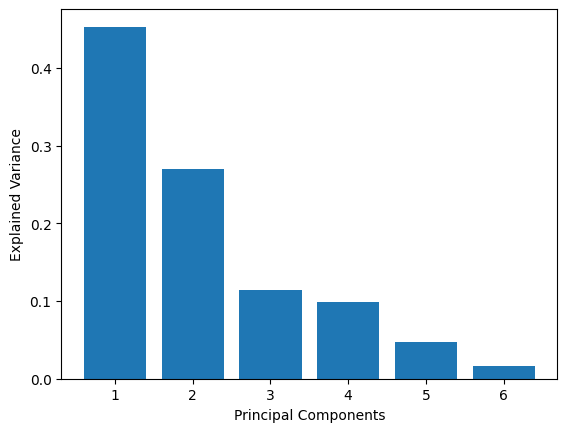

In [547]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")

## **KMeans Clustering**

In [548]:
from sklearn.cluster import KMeans
cus = []
for i in range (1,11):
  km = KMeans(n_clusters = i,n_init = 10)
  km.fit(X_new)
  c = km.inertia_
  cus.append(c)

In [549]:
cus

[2112.000000000001,
 1388.5544964452138,
 1089.4705507950146,
 948.4048667313446,
 828.5828110539023,
 746.8970531114538,
 679.1432051716661,
 623.5480452334932,
 592.4946885262394,
 557.7318019050895]

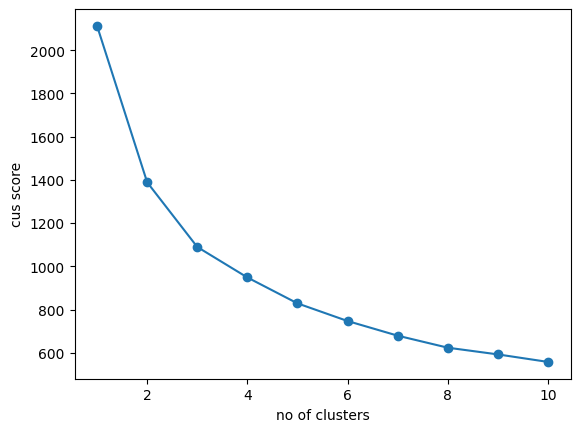

In [550]:
# Elbow Method (choosing right number of clusters)
plt.plot(range(1,11),cus,marker='o')
plt.xlabel('no of clusters')
plt.ylabel('cus score')
plt.show()

In [551]:
km = KMeans(n_clusters=3,n_init=10)
km.fit(X_new)


KMeans(n_clusters=3, n_init=10)

In [552]:
cluster_labels = km.predict(X_new)

In [553]:
cluster_labels

array([0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0,
       1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0,
       2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2,
       2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1,

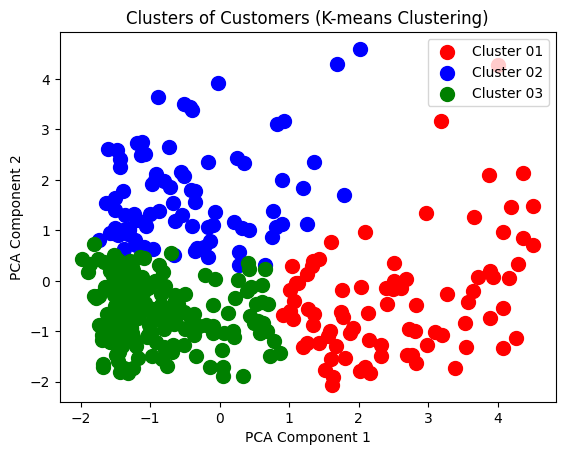

In [554]:
plt.scatter(X_new[cluster_labels==0,0],X_new[cluster_labels==0,1],s=100,c='red',label='Cluster 01')
plt.scatter(X_new[cluster_labels==1,0],X_new[cluster_labels==1,1],s=100,c='blue',label='Cluster 02')
plt.scatter(X_new[cluster_labels==2,0],X_new[cluster_labels==2,1],s=100,c='green',label='Cluster 03')
plt.title('Clusters of Customers (K-means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

In [555]:
#calculating silhouette_score
from sklearn.metrics import silhouette_score
score = silhouette_score(X_new, cluster_labels)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.31


In [556]:
#creating classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, cluster_labels, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.82      0.30      0.44       233
           2       0.14      0.21      0.17       119

    accuracy                           0.27       352
   macro avg       0.32      0.17      0.20       352
weighted avg       0.59      0.27      0.35       352



In [557]:
# for Improving the accuracy level
from sklearn.metrics import confusion_matrix, classification_report
from scipy.optimize import linear_sum_assignment

# Compute confusion matrix
conf_mat = confusion_matrix(y_train, cluster_labels)

#Use Hungarian algorithm for optimal label mapping
row_ind, col_ind = linear_sum_assignment(-conf_mat)
label_mapping = {col: row for row, col in zip(row_ind, col_ind)}

# Apply mapping to predicted labels
y_pred_mapped = np.array([label_mapping[label] for label in cluster_labels])

#Evaluate with classification report
print(classification_report(y_train, y_pred_mapped,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.86      0.68      0.76       233
           2       0.95      0.66      0.78       119

    accuracy                           0.68       352
   macro avg       0.61      0.45      0.51       352
weighted avg       0.89      0.68      0.77       352



# **Agglomerative clustering**

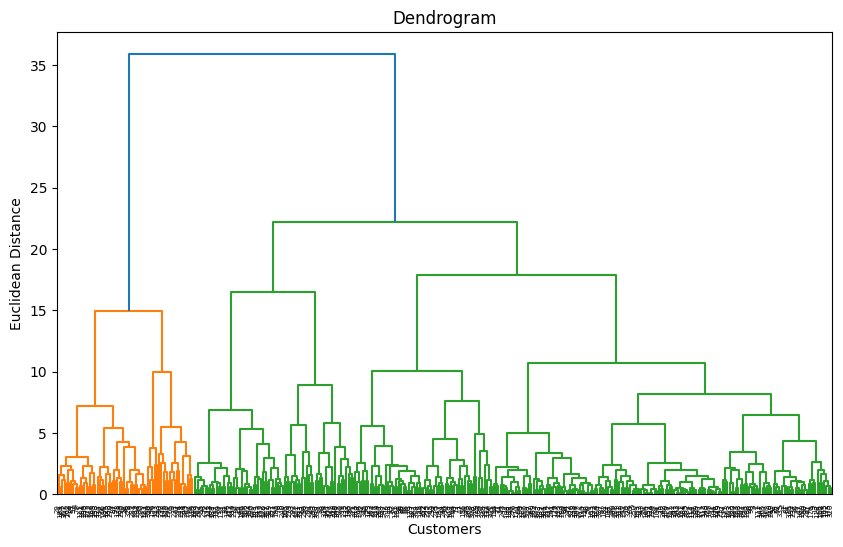

In [558]:
#Optimum number of clusters needed using dendrogram method
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 6))
dendo = sch.dendrogram(sch.linkage(X_new, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [559]:
#creating Agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
hcn = AgglomerativeClustering(n_clusters=3,linkage='ward')
hc = hcn.fit_predict(X_new)


In [560]:
hc

array([1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2,

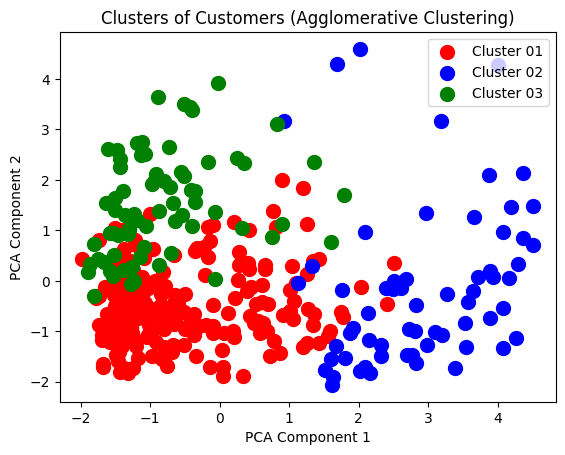

In [561]:
plt.scatter(X_new[hc==0,0],X_new[hc==0,1],s=100,c='red',label='Cluster 01')
plt.scatter(X_new[hc==1,0],X_new[hc==1,1],s=100,c='blue',label='Cluster 02')
plt.scatter(X_new[hc==2,0],X_new[hc==2,1],s=100,c='green',label='Cluster 03')
plt.title('Clusters of Customers (Agglomerative Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

In [562]:
#calculating silhouette_score
score = silhouette_score(X_new, hc)
print(f"Silhouette Score (Hierarchical Clustering): {score:.4f}")

Silhouette Score (Hierarchical Clustering): 0.2789


In [563]:
#creating classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, hc, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.08      0.02      0.03       233
           2       0.12      0.08      0.09       119

    accuracy                           0.04       352
   macro avg       0.07      0.03      0.04       352
weighted avg       0.10      0.04      0.05       352



In [564]:
from sklearn.metrics import confusion_matrix, classification_report
from scipy.optimize import linear_sum_assignment
conf_mat = confusion_matrix(y_train, hc)

row_ind, col_ind = linear_sum_assignment(-conf_mat)
label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
y_pred_mapped = np.array([label_mapping[label] for label in hc])
print(classification_report(y_train, y_pred_mapped,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.76      0.70      0.73       233
           2       0.92      0.48      0.63       119

    accuracy                           0.63       352
   macro avg       0.56      0.39      0.45       352
weighted avg       0.81      0.63      0.70       352



# **DBSCAN**

In [565]:
#creating DBSCAN model
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=3)
db=dbscan.fit_predict(X_new)

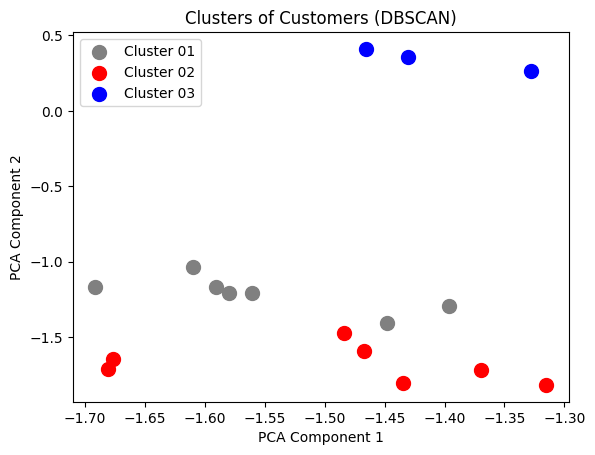

In [566]:
plt.scatter(X_new[db==0,0],X_new[db==0,1],s=100,c='gray',label='Cluster 01')
plt.scatter(X_new[db==1,0],X_new[db==1,1],s=100,c='red',label='Cluster 02')
plt.scatter(X_new[db==2,0],X_new[db==2,1],s=100,c='blue',label='Cluster 03')
plt.title('Clusters of Customers (DBSCAN)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

In [567]:
#calculating silhouette_score
score = silhouette_score(X_new, db)
print(f"Silhouette Score (DBSCAN): {score:.4f}")

Silhouette Score (DBSCAN): -0.2632


In [568]:
#creating classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, db, zero_division=0))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           1       1.00      0.03      0.06       233
           2       0.00      0.00      0.00       119
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.02       352
   macro avg       0.17      0.01      0.01       352
weighted avg       0.66      0.02      0.04       352



In [569]:
# for improving accuracy level
from sklearn.metrics import confusion_matrix, classification_report
from scipy.optimize import linear_sum_assignment
mask = db != -1
conf_mat = confusion_matrix(y_train[mask], db[mask])
row_ind, col_ind = linear_sum_assignment(-conf_mat)
label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
y_pred_mapped_db = np.array([label_mapping[label] if label != -1 else -1 for label in db])
print(classification_report(y_train[mask], y_pred_mapped_db[mask], zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.47        23
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.30        23
   macro avg       0.20      0.06      0.09        23
weighted avg       1.00      0.30      0.47        23

